**1.Как связаны главные компоненты с исходными данными?**

Главные компоненты (ГК) являются линейными комбинациями исходных признаков данных и позволяют уменьшить их размерность, 
сохраняя при этом как можно больше информации о дисперсии данных.

**2.Сделайте грубую оценку сжатия данных, если исходная матрица имела размерность (4250, 7),
а при восстановлении используются три главные компоненты.**

Имеем матрицу данных размером 4250 × 7. Это означает, что у нас есть 4250 объектов и 7 признаков для каждого объекта.

4250 × 7 = 29750 - общее кол-во элем матрицы 

4250 × 3 = 12750 - сумма на основе 3 главных компонентов для все 4250 объектов 

Матрица весов (собственные векторы), которая связывает 7 исходных признаков с 3 главными компонентами. Размер этой матрицы — 7 × 3(каждая главная компонента является линейной комбинацией исходных 7 признаков) 7 х 3 = 21

12750 + 21 = 12771 - итоговая размерность после сжатия 

Оценим сжатые данные - 12771 / 29750 = 0,429 (43%)

**3.Сгенерируйте данные в виде эллипса с центром в точке (1.5, -2.5), радиусами (3, 2.5), углом 65 и количеством точек 1100. 
Оцените собственные вектора, собственные значения, максимальные и минимальные значения в пространстве главных компонент.**

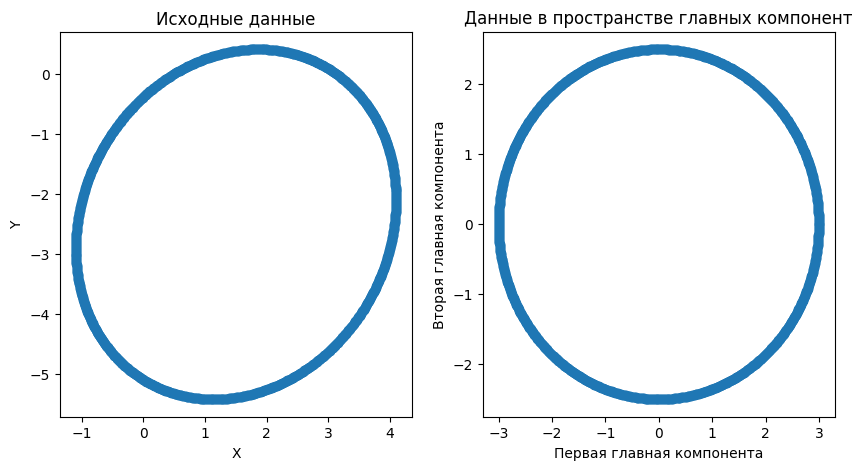

Собственные значения: [4.50818182 3.125     ]
Собственные векторы:
 [[ 0.42261826  0.90630779]
 [ 0.90630779 -0.42261826]]
Объясненная дисперсия каждой компоненты: [0.59060323 0.40939677]
Максимальное значение первой главной компоненты: 2.997272727272729
Минимальное значение первой главной компоненты: -3.002715015412929
Максимальное значение второй главной компоненты: 2.4999974463915415
Минимальное значение второй главной компоненты: -2.4999974463915406


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Параметры эллипса
center = np.array([1.5, -2.5])
radii = np.array([3, 2.5])
angle = np.deg2rad(65)
num_points = 1100

# Генерация данных эллипса
theta = np.linspace(0, 2*np.pi, num_points)
x = center[0] + radii[0] * np.cos(theta) * np.cos(angle) - radii[1] * np.sin(theta) * np.sin(angle)
y = center[1] + radii[0] * np.cos(theta) * np.sin(angle) + radii[1] * np.sin(theta) * np.cos(angle)
data = np.column_stack((x, y))

# Визуализация исходных данных
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Исходные данные')

# Применение PCA
pca = PCA()
pca.fit(data)
transformed_data = pca.transform(data)

# Визуализация данных в пространстве главных компонент
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Данные в пространстве главных компонент')
plt.show()

# Собственные значения и векторы
print("Собственные значения:", pca.explained_variance_)
print("Собственные векторы:\n", pca.components_)

# Объясненная дисперсия
explained_variance_ratio = pca.explained_variance_ratio_
print("Объясненная дисперсия каждой компоненты:", explained_variance_ratio)

# Максимальные и минимальные значения в пространстве главных компонент
print("Максимальное значение первой главной компоненты:", transformed_data[:, 0].max())
print("Минимальное значение первой главной компоненты:", transformed_data[:, 0].min())
print("Максимальное значение второй главной компоненты:", transformed_data[:, 1].max())
print("Минимальное значение второй главной компоненты:", transformed_data[:, 1].min())

**4.Для набора данных Cars проанализируйте веса главных компонент при использовании числовых признаков. Какой из параметров вносит наименьший вклад в первую главную компоненту?**

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Загрузка данных
# Замените путь на путь к вашему файлу cars.csv
df = pd.read_csv('cars.csv')

# 2. Выбор только числовых признаков
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# 3. Масштабирование данных (нормализация признаков)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# 4. Применение PCA
pca = PCA()
pca.fit(scaled_data)

# 5. Получение весов признаков для главных компонент
pca_components = pd.DataFrame(pca.components_, columns=numeric_features.columns)

# 6. Вклад признаков в первую главную компоненту
first_component_weights = pca_components.iloc[0]

# 7. Параметр с наименьшим вкладом в первую главную компоненту
min_contribution_param = first_component_weights.idxmin()

# Вывод результатов
print("Веса признаков для первой главной компоненты:\n", first_component_weights)
print("\nПараметр, вносящий наименьший вклад в первую главную компоненту:", min_contribution_param)


Веса признаков для первой главной компоненты:
 Year                    0.650361
Distance               -0.452745
Engine_capacity(cm3)    0.188220
Price(euro)             0.580194
Name: 0, dtype: float64

Параметр, вносящий наименьший вклад в первую главную компоненту: Distance
